In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook")

In [2]:
class ContinuousUniformRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.low = a
        self.high = b
        
    def draw(self, n_samples):
        samples = np.random.uniform(self.low, self.high, n_samples)
        return samples

In [3]:
Zufallspunkt = ContinuousUniformRandomVariable(0, 1)
Zufallspunkt.draw(10)

array([0.19188225, 0.08479125, 0.29423183, 0.6388897 , 0.24794905,
       0.56759123, 0.24149685, 0.36944462, 0.81070926, 0.2808248 ])

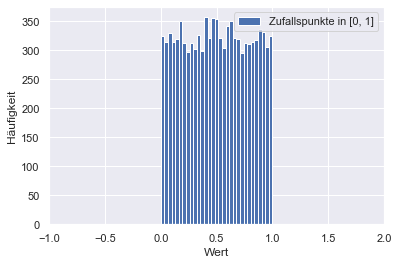

In [4]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)
plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(Zufallspunkt.low - 1, Zufallspunkt.high + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"Zufallspunkte in [{Zufallspunkt.low}, {Zufallspunkt.high}]"]);

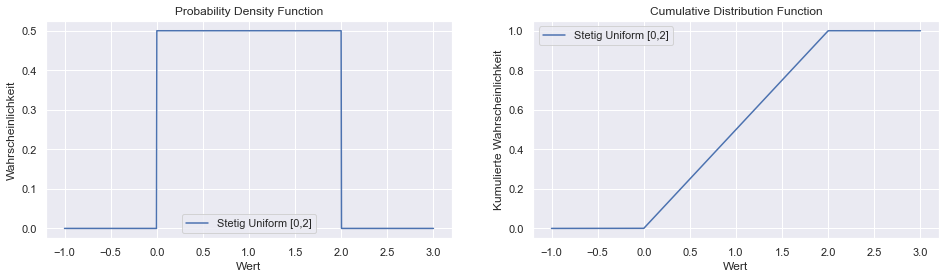

In [5]:
from scipy.stats import uniform

a = 0
b = 2
x = np.linspace(a - 1, b + 1, 1000)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
y_pdf = uniform.pdf(x, a, b)
plt.plot(x, y_pdf, label = f"Stetig Uniform [{a},{b}]")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = uniform.cdf(x, a, b)
plt.plot(x, y_cdf, label = f"Stetig Uniform [{a},{b}]")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

In [6]:
class NormalRandomVariable:
    def __init__(self, mu = 0, sigma = 1):
        self.mu = mu
        self.sigma = sigma
        
    def draw(self, n_samples):
        samples = np.random.normal(self.mu, self.sigma, n_samples)
        return samples

In [7]:
Zufallspunkt = NormalRandomVariable(0, 2)
Zufallspunkt.draw(10)

array([ 0.2496672 , -0.92368441, -1.22524642, -0.17942151,  2.11362441,
       -1.66081317, -0.14043149,  3.1338268 , -0.48452831,  0.75022413])

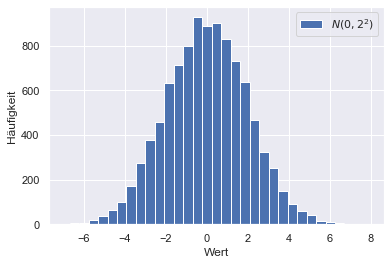

In [8]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)

plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(min(sample) - 1, max(sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"$N({Zufallspunkt.mu},{Zufallspunkt.sigma}^2)$"]);

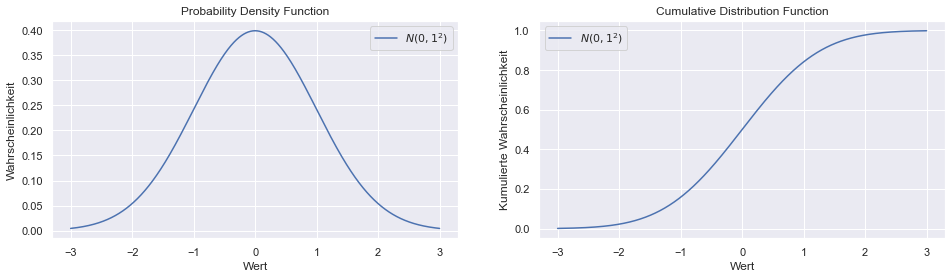

In [9]:
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
y_pdf = norm.pdf(x, mu, sigma)
plt.plot(x, y_pdf, label = f"$N({mu},{sigma}^2)$")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = norm.cdf(x, mu, sigma)
plt.plot(x, y_cdf, label = f"$N({mu},{sigma}^2)$")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

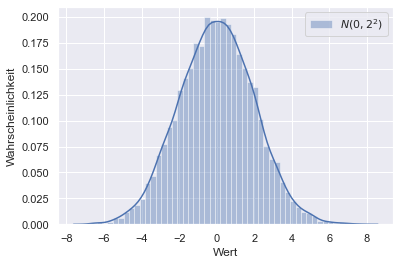

In [10]:
sns.distplot(sample)
plt.xlabel("Wert")
plt.ylabel("Wahrscheinlichkeit")
plt.legend([f"$N({Zufallspunkt.mu},{Zufallspunkt.sigma}^2)$"]);

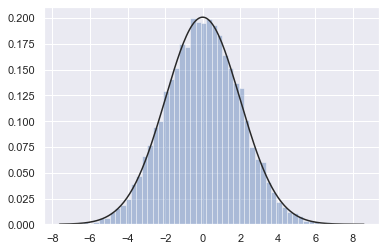

In [11]:
sns.distplot(sample, fit = norm, kde = False);

In [12]:
mu, sigma = norm.fit(sample)
print(f"loc = {mu}, scale = {sigma}")

loc = -0.003039700451419739, scale = 1.986048022152088


In [13]:
x = np.linspace(min(sample) - 1, max(sample) + 1, 100)
pdf = norm.pdf(x, loc = mu, scale = sigma)
cdf = norm.cdf(x, loc = mu, scale = sigma)

cdf_ = np.linspace(start = 0, stop = 1, num = 100)
x_ = norm.ppf(cdf_, loc = mu, scale = sigma)

In [14]:
cdf_1 = norm.cdf(1, loc = mu, scale = sigma)
cdf_1

0.6932356913672328

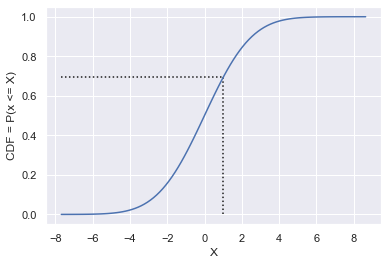

In [15]:
plt.plot(x, cdf)
plt.vlines(1, 0, cdf_1, linestyle = ":")
plt.hlines(cdf_1, min(sample) - 1, 1, linestyle = ":")
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [16]:
x_99 = norm.ppf(0.99, loc = mu, scale = sigma)
x_99

4.6171988936251065

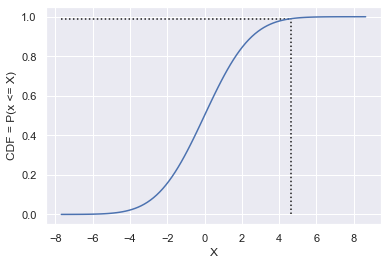

In [17]:
plt.plot(x, cdf)
plt.hlines(.99, min(sample)-1, x_99, linestyle = ":")
plt.vlines(x_99, 0, .99, linestyle = ":")
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [18]:
class ExponentialRandomVariable:
    def __init__(self, rate):
        self.rate = rate
        
    def draw(self, n_samples):
        samples =  np.random.exponential(self.rate, n_samples)
        return samples

In [19]:
Zufallspunkt = ExponentialRandomVariable(3)
Zufallspunkt.draw(10)

array([11.09613671,  4.77481995,  3.63961694,  0.41557857,  3.82983875,
        5.04574802,  0.49465198,  2.24027472,  0.15876443,  0.04158948])

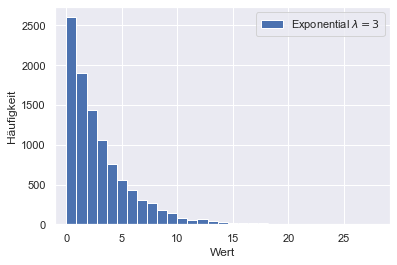

In [20]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)
plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(min(sample) - 1, max(sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"Exponential $\lambda={Zufallspunkt.rate}$"]);

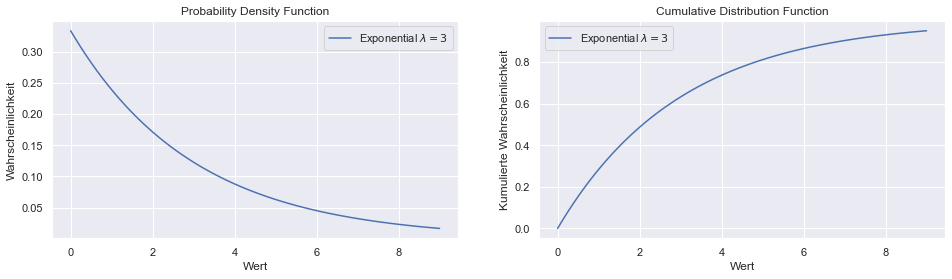

In [21]:
from scipy.stats import expon

rate = 3

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
x = np.linspace(0, rate*3, 100)
y_pdf = expon.pdf(x, scale = rate)
plt.plot(x, y_pdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = expon.cdf(x, scale = rate)
plt.plot(x, y_cdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

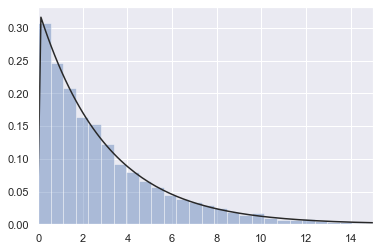

In [24]:
sns.distplot(sample, fit = expon, kde = False)
plt.xlim(0, 15);

In [25]:
loc, rate = expon.fit(sample)
print(f"lambda = {rate}")

lambda = 3.036529502971152


In [26]:
x = np.linspace(min(sample) - 1, max(sample) + 1, 100)
pdf = expon.pdf(x, loc = loc, scale = rate)
cdf = expon.cdf(x, loc = loc, scale = rate)

cdf_ = np.linspace(start = 0, stop = 1, num = 100)
x_ = expon.ppf(cdf_, loc = loc, scale = rate)

In [27]:
cdf_1 = expon.cdf(1, loc = loc, scale = rate)
cdf_1

0.280468649950068

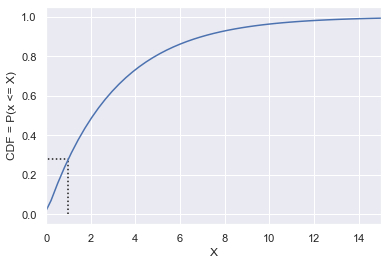

In [28]:
plt.plot(x, cdf)
plt.vlines(1, 0, cdf_1, linestyle = ":")
plt.hlines(cdf_1, min(sample) - 1, 1, linestyle = ":")
plt.xlim(0, 15)
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [29]:
x_99 = expon.ppf(0.99, loc = loc, scale = rate)
x_99

13.984245715942606

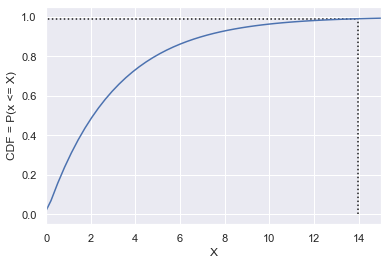

In [30]:
plt.plot(x, cdf)
plt.hlines(.99, min(sample)-1, x_99, linestyle = ":")
plt.vlines(x_99, 0, .99, linestyle = ":")
plt.xlim(0, 15)
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");